# **MNIST handwriting detection**

In [0]:
import keras
from keras.models import Sequential #import Sequential: https://keras.io/models/sequential/
from keras.layers import Dense      #import Dense: https://keras.io/layers/core/#dense
from keras.optimizers import RMSprop#import RMSprop: It is recommended to leave 
                                    #the parameters of this optimizer at their default values
                                    #(except the learning rate, which can be freely tuned).
from keras.layers import Dropout    #Dropout consists in randomly setting a fraction rate of 
                                    #input units to 0 at each update during training time, 
                                    #which helps prevent overfitting.
import numpy as np                  #import numarical python
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# Plot ad hoc mnist instances
from keras.datasets import mnist 

In [4]:
mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.6/dist-packages/keras/datasets/mnist.py'>

In [0]:
# load (downloaded if needed) the MNIST dataset
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [0]:
# flatten 28*28 images to a 784 vector for each image

#num_pixels = X_train.shape[1] * X_train.shape[2]
#X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
#X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


# normalize inputs from 0-255 to 0-1
x_train /= 255
x_test /= 255


# one hot encode outputs
y_train = keras.utils.to_categorical(y_train,num_classes=10 )
y_test = keras.utils.to_categorical(y_test,num_classes=10 )


In [0]:
batch_size = 64
num_classes = 10
epochs = 100

In [0]:
# create model
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='relu'))
model.add(Dense(212, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation = 'softmax'))



In [9]:
# summary of model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 212)               108756    
_________________________________________________________________
dropout_1 (Dropout)          (None, 212)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                13632     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 524,958
Trainable params: 524,958
Non-trainable params: 0
_________________________________________________________________


In [10]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])
# fit model
hist=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.2309 - acc: 0.9298 - val_loss: 0.1143 - val_acc: 0.9639
Epoch 2/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0968 - acc: 0.9722 - val_loss: 0.0971 - val_acc: 0.9721
Epoch 3/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0721 - acc: 0.9794 - val_loss: 0.0835 - val_acc: 0.9768
Epoch 4/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0583 - acc: 0.9840 - val_loss: 0.1094 - val_acc: 0.9684
Epoch 5/10
60000/60000 [==============================] - 6s 94us/step - loss: 0.0501 - acc: 0.9860 - val_loss: 0.0979 - val_acc: 0.9777
Epoch 6/10
60000/60000 [==============================] - 6s 96us/step - loss: 0.0481 - acc: 0.9877 - val_loss: 0.0932 - val_acc: 0.9806
Epoch 7/10
60000/60000 [==============================] - 6s 95us/step - loss: 0.0404 - acc: 0.9903 - val_loss: 0.1110 - val_ac

In [11]:
import sys
sys.version

'3.6.7 (default, Oct 22 2018, 11:32:17) \n[GCC 8.2.0]'

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [15]:
#print loss score
print('Test loss:', score[0]*100)

Test loss: 14.77717303594988


In [16]:
#print accuracy score
print('Test accuracy:', score[1]*100)

Test accuracy: 97.91


In [17]:
# ptint history keys
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


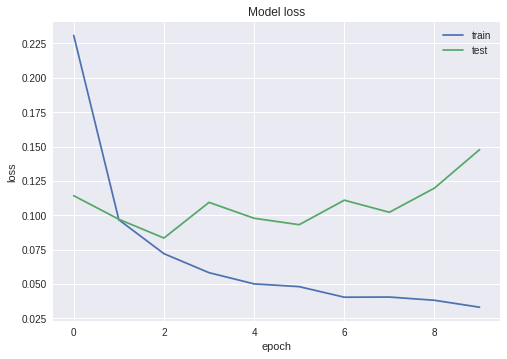

In [18]:
import matplotlib.pyplot as plt        #import matplotlib
# plot figure1
fig1 = plt.figure()                    
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
fig1.savefig('loss_plot.jpg')          # save figure1

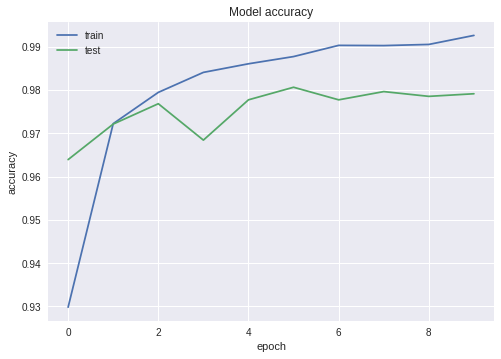

In [19]:
# plot figure2
fig2 = plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
#save figure2
fig2.savefig('acc_plot.jpg')

In [20]:
import os
print( os.getcwd() )

/content


In [21]:
print( os.listdir() )

['.config', 'sample_data', 'loss_plot.jpg', 'acc_plot.jpg']


In [0]:
# download figure
from google.colab import files
files.download( "acc_plot.jpg" )
from google.colab import files
files.download( "loss_plot.jpg" )
